# OULAD DATA - Dataset 1


# Data Imports

In [1]:
#Importing Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, cohen_kappa_score, matthews_corrcoef,
                             roc_auc_score, roc_curve, auc, f1_score,classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [2]:
#Load seven datasets
studentRegistration = pd.read_csv("studentRegistration.csv",na_values=['?','',' ','-','NA','N/A'])
studentInfo = pd.read_csv("studentInfo.csv",na_values=['?','',' ','-','NA','N/A'])
studentVle = pd.read_csv("studentVle.csv",engine='python',encoding='utf-8')
#studentVle = pd.read_csv('/content/studentVle.csv')
studentAssessment = pd.read_csv("studentAssessment.csv",na_values=['?','',' ','-','NA','N/A'])
courses = pd.read_csv("courses.csv",na_values=['?','',' ','-','NA','N/A'])
vle = pd.read_csv("vle.csv",na_values=['?','',' ','-','NA','N/A'])
assessments = pd.read_csv("assessments.csv",na_values=['?','',' ','-','NA','N/A'])

Checking if all data sets succesfully read

In [3]:
print(studentRegistration.head())

  code_module code_presentation  id_student  date_registration  \
0         AAA             2013J       11391             -159.0   
1         AAA             2013J       28400              -53.0   
2         AAA             2013J       30268              -92.0   
3         AAA             2013J       31604              -52.0   
4         AAA             2013J       32885             -176.0   

   date_unregistration  
0                  NaN  
1                  NaN  
2                 12.0  
3                  NaN  
4                  NaN  


In [4]:
print(vle.head())

   id_site code_module code_presentation activity_type  week_from  week_to
0   546943         AAA             2013J      resource        NaN      NaN
1   546712         AAA             2013J     oucontent        NaN      NaN
2   546998         AAA             2013J      resource        NaN      NaN
3   546888         AAA             2013J           url        NaN      NaN
4   547035         AAA             2013J      resource        NaN      NaN


In [5]:
print(assessments.head())

  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0
3         AAA             2013J           1755             TMA  166.0    20.0
4         AAA             2013J           1756             TMA  215.0    30.0


In [6]:
print(courses.head())

  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268
3         BBB             2014J                         262
4         BBB             2013B                         240


In [7]:
print(studentInfo.head())

  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equivalent   30-40%    35-55                     0   
3  A Level or Equivalent   50-60%    35-55                     0   
4     Lower Than A Level   50-60%     0-35                     0   

   studied_credits disability final_result  
0              240          N         Pass  
1               60          N         Pass  

In [8]:
print(studentAssessment.head())

   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0
3           1752       32885              26          0   69.0
4           1752       38053              19          0   79.0


In [9]:
print(studentVle.head())

  code_module code_presentation  id_student  id_site  date  sum_click
0         AAA             2013J       28400   546652   -10          4
1         AAA             2013J       28400   546652   -10          1
2         AAA             2013J       28400   546652   -10          1
3         AAA             2013J       28400   546614   -10         11
4         AAA             2013J       28400   546714   -10          1


In [10]:
#Total number of rows & columns
print("Number of rows of student Registration:",{studentRegistration.shape[0]},"Number of columns:",{studentRegistration.shape[1]})
print("Number of rows of student Info:",{studentInfo.shape[0]},"Number of columns:",{studentInfo.shape[1]})
print("Number of rows of student Assessment:",{studentAssessment.shape[0]},"Number of columns:",{studentAssessment.shape[1]})
print("Number of rows of courses:",{courses.shape[0]},"Number of columns:",{courses.shape[1]})
print("Number of rows of studentVle:",{studentVle.shape[0]},"Number of columns:",{studentVle.shape[1]})
print("Number of rows of Vle:",{vle.shape[0]}, "Number of columns:",{vle.shape[1]})
print("Number of rows of assessments:",{assessments.shape[0]},"Number of columns:",{assessments.shape[1]})

Number of rows of student Registration: {32593} Number of columns: {5}
Number of rows of student Info: {32593} Number of columns: {12}
Number of rows of student Assessment: {173912} Number of columns: {5}
Number of rows of courses: {22} Number of columns: {3}
Number of rows of studentVle: {10655280} Number of columns: {6}
Number of rows of Vle: {6364} Number of columns: {6}
Number of rows of assessments: {206} Number of columns: {6}


Most students overall passed

In [11]:
#Check missing values of studentRegistration dataset
studentRegistration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

70% of the rows are missing date_unregistration. This means that 70% of the students don't withdraw the modules.

In [12]:
#Group studentRegistration by course module code and the presentation code
registration_counter = studentRegistration.groupby(["code_module", "code_presentation"]).size()
registration_counter.reset_index()

,code_module,code_presentation,0
0,AAA,2013J,383
1,AAA,2014J,365
2,BBB,2013B,1767
3,BBB,2013J,2237
4,BBB,2014B,1613
5,BBB,2014J,2292
6,CCC,2014B,1936
7,CCC,2014J,2498
8,DDD,2013B,1303
9,DDD,2013J,1938


In [13]:
max_id = registration_counter.idxmax()
min_id = registration_counter.idxmin()
print(
    f"The largest module presentation {max_id},"
    f"with the smallest module presentation {min_id} "
    f"and the average module-presentation registration being {registration_counter.mean()}."
)

The largest module presentation ('CCC', '2014J'),with the smallest module presentation ('AAA', '2014J') and the average module-presentation registration being 1481.5.


In [14]:
studentInfo['code_module'].value_counts()

code_module
BBB    7909
FFF    7762
DDD    6272
CCC    4434
EEE    2934
GGG    2534
AAA     748
Name: count, dtype: int64

In [15]:
studentInfo['code_presentation'].value_counts()

code_presentation
2014J    11260
2013J     8845
2014B     7804
2013B     4684
Name: count, dtype: int64

# Missing Value Checks

In [16]:
#Check missing values of studentVle dataset
studentVle.isna().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
dtype: int64

In [17]:
#Check missing values of studentAssessment dataset
studentAssessment.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

In [18]:
#Check missing values of courses dataset
courses.isna().sum()

code_module                   0
code_presentation             0
module_presentation_length    0
dtype: int64

In [19]:
#Check missing values of vle dataset
vle.isna().sum()

id_site                 0
code_module             0
code_presentation       0
activity_type           0
week_from            5243
week_to              5243
dtype: int64

In [20]:
#Check missing values of assessments dataset
assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

# **Assessment dataset**

In [21]:
order = assessments['assessment_type'].value_counts().index
print(order)

Index(['TMA', 'CMA', 'Exam'], dtype='object', name='assessment_type')


In [22]:
#Dropping missing columns that contain numerous missing values, context for columns, deemed unnecessary
vle.drop(columns=['week_from','week_to'],inplace=True)

In [23]:
#calculate the frequency of each unique value in the final_result column
studentInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: count, dtype: int64

## **HANDLING MISMATCHES**

In [24]:
# Students who have a date of unregistration recorded
unregistered = studentRegistration[studentRegistration['date_unregistration'].notna()][['id_student','code_module','code_presentation','date_unregistration']]
# Merge unregistered students with studentInfo
merged = pd.merge(studentInfo, unregistered, on=['id_student','code_module','code_presentation'])
# Inconsistencies
inconsistent_results = merged[merged['final_result'] != 'Withdrawn']
print(inconsistent_results) #Produces 9 rows

     code_module code_presentation  id_student gender                region  \
719          BBB             2013J      362907      F     South West Region   
724          BBB             2013J      365288      F          South Region   
869          BBB             2013J      554243      F     South West Region   
4961         DDD             2013J      315082      M  West Midlands Region   
5010         DDD             2013J      403052      F      Yorkshire Region   
5293         DDD             2013J      582954      M         London Region   
7853         FFF             2013J      234004      M      Yorkshire Region   
8001         FFF             2013J      523777      M          North Region   
8340         FFF             2013J      601640      M         London Region   

          highest_education imd_band age_band  num_of_prev_attempts  \
719      Lower Than A Level   20-30%    35-55                     2   
724   A Level or Equivalent   70-80%     0-35                     0

In [25]:
#Make these rows withdrawn
for student_id, code_module, code_presentation in inconsistent_results[['id_student', 'code_module', 'code_presentation']].values:
    studentInfo.loc[
        (studentInfo['id_student'] == student_id) & (studentInfo['code_module'] == code_module) & (studentInfo['code_presentation'] == code_presentation),
        'final_result'] = 'Withdrawn'

In [26]:
#For those students that do not deregister=0 and those that do encode with 1
studentRegistration['date_unregistration'] = ['0' if pd.isnull(days) else '1' for days in studentRegistration['date_unregistration']]

In [27]:
#Merging courses with main table
student_registration_with_courses=studentRegistration.merge(courses,on=['code_module','code_presentation'],how='left')

In [28]:
#Splitting course for year analysis
student_registration_with_courses['Year'] = student_registration_with_courses['code_presentation'].str[0:4]
student_registration_with_courses['Starting_Month'] = ['February' if code[-1] == 'B' else 'October' for code in student_registration_with_courses['code_presentation']]

In [29]:
student_registration_with_courses

,code_module,code_presentation,id_student,date_registration,date_unregistration,module_presentation_length,Year,Starting_Month
0,AAA,2013J,11391,-159.0,0,268,2013,October
1,AAA,2013J,28400,-53.0,0,268,2013,October
2,AAA,2013J,30268,-92.0,1,268,2013,October
3,AAA,2013J,31604,-52.0,0,268,2013,October
4,AAA,2013J,32885,-176.0,0,268,2013,October
...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,-4.0,0,269,2014,October
32589,GGG,2014J,2645731,-23.0,0,269,2014,October
32590,GGG,2014J,2648187,-129.0,0,269,2014,October
32591,GGG,2014J,2679821,-49.0,1,269,2014,October


In [30]:
#The Withdrawn results now increase
studentInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10165
Fail            7043
Distinction     3024
Name: count, dtype: int64

In [31]:
print(studentAssessment.shape)
print(assessments.shape)

(173912, 5)
(206, 6)


(173912, 5) #Reproduce size
(206, 6)

In [32]:
#Grouping each module by weight to check
assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\3708421429.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))


total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     300.0
            2014J                     300.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     100.0
            2014B                     100.0
            2014J                     100.0

Weights of the exams should sum up to 100% and other assessments should sum up to 100%. Total weight of each module presentation should be 200.

In [33]:
#Checking how grouped by assessment type
assessments[assessments.code_module.isin(["AAA","CCC","GGG"])].groupby(['code_module','code_presentation',"assessment_type"]).agg(total_weight = ('weight',sum))

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2398935047.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments[assessments.code_module.isin(["AAA","CCC","GGG"])].groupby(['code_module','code_presentation',"assessment_type"]).agg(total_weight = ('weight',sum))


total_weight
code_module code_presentation assessment_type              
AAA         2013J             Exam                    100.0
                              TMA                     100.0
            2014J             Exam                    100.0
                              TMA                     100.0
CCC         2014B             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
            2014J             CMA                      25.0
                              Exam                    200.0
                              TMA                      75.0
GGG         2013J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014B             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0
            2014J             CMA                       0.0
                              Exam                    100.0
                              TMA                       0.0

Module CCC has an inconsistency. Total exam weight is 200%. Module CCC has 2 exams in every presentation so could be v entered as twice as100% instead of 50%. Also Module GGG, has no weight assigned to TMA type or CMA type. We shall make the TMA type assignments' weight imputed as to add up to 100.

In [34]:
#Dividing weights accross
assessments.loc[(assessments.code_module=='CCC')&(assessments.assessment_type=='Exam'),'weight'] = assessments.loc[(assessments.code_module=='CCC') &(assessments.assessment_type=='Exam'),'weight']/2
assessments.loc[(assessments.code_module=='GGG') & (assessments.assessment_type=='TMA'),'weight']=(100/3)

In [35]:
#Checking new weights - corrected
assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2663595719.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  assessments.groupby(['code_module','code_presentation']).agg(total_weight = ('weight',sum))


total_weight
code_module code_presentation              
AAA         2013J                     200.0
            2014J                     200.0
BBB         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
CCC         2014B                     200.0
            2014J                     200.0
DDD         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
EEE         2013J                     200.0
            2014B                     200.0
            2014J                     200.0
FFF         2013B                     200.0
            2013J                     200.0
            2014B                     200.0
            2014J                     200.0
GGG         2013J                     200.0
            2014B                     200.0
            2014J                     200.0

In [36]:
joined=pd.merge(studentAssessment, assessments,on='id_assessment',how='left')
joined['weighted_score']=(joined['score'] / 100)*joined['weight']

In [37]:
#Computing the marks for each student based on the weighted score for each assessment
marks = joined.groupby(['id_student','code_module','code_presentation'], as_index=False)[['weighted_score', 'weight']].sum()
marks['adjusted_mark']=(marks['weighted_score'] /marks['weight'])*100
marks['final_mark']=marks['adjusted_mark']
marks

,id_student,code_module,code_presentation,weighted_score,weight,adjusted_mark,final_mark
0,6516,AAA,2014J,63.50,100.0,63.500000,63.500000
1,8462,DDD,2013J,34.90,40.0,87.250000,87.250000
2,8462,DDD,2014J,43.00,50.0,86.000000,86.000000
3,11391,AAA,2013J,82.40,100.0,82.400000,82.400000
4,23629,BBB,2013B,16.69,25.0,66.760000,66.760000
...,...,...,...,...,...,...,...
25838,2698257,AAA,2013J,69.40,100.0,69.400000,69.400000
25839,2698535,CCC,2014B,9.37,39.0,24.025641,24.025641
25840,2698535,EEE,2013J,53.44,100.0,53.440000,53.440000
25841,2698577,BBB,2014J,55.80,100.0,55.800000,55.800000


25843 rows × 7 columns - Marks rows

#  Merge and Imputation of Withdrawn Students

In [38]:
# Merge calculated marks into studentInfo
studentInfo=pd.merge(studentInfo,marks,on=['id_student','code_module','code_presentation'],how='left')

In [39]:
#Dropping calculation columns
studentInfo.drop(columns=['weighted_score','weight','adjusted_mark'], inplace=True)

In [40]:
studentInfo.isna().sum()

code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                1111
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
final_mark              6982
dtype: int64

# Impute Final Marks for Modeling

In [41]:
#Fill in missing final marks with zero
studentInfo['final_mark'] = studentInfo['final_mark'].fillna(0).astype(int)

In [42]:
#Non-Mark Failures- Students who failed despite having an excellent score (over 70%).
studentInfo['high_mark_fail'] = np.where((studentInfo['final_result'] == 'Fail') & (studentInfo['final_mark'] >= 70),1,0)

In [43]:
# Merge student_registration_with_courses into studentInfo
studentInfo = studentInfo.merge(student_registration_with_courses,on = ['code_module','code_presentation','id_student'],how ='inner')

In [44]:
studentInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10165
Fail            7043
Distinction     3024
Name: count, dtype: int64

In [45]:
studentInfo=studentInfo.drop(['date_registration','Year','Starting_Month'],axis=1)

In [46]:
studentInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10165
Fail            7043
Distinction     3024
Name: count, dtype: int64

In [47]:
#Combined student clicks with the resource types
studentVle = studentVle.merge(vle, on = ['code_module','code_presentation','id_site'],how ='inner')

In [48]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage
10655276,GGG,2014J,675578,896943,269,1,homepage
10655277,GGG,2014J,654064,896943,269,3,homepage
10655278,GGG,2014J,654064,896939,269,1,forumng


In [49]:
studentVle.shape

(10655280, 7)

10655280 rows × 7 columns -Check size after merging

The next step is to aggregate the studentVle first, turning the many-to-one relationship (many clicks to one student). We’ll summarize student activity per student–module–presentation, e.g., total clicks, number of days active, or activity types.

In [50]:
# Aggregate the click log to represent a single student
vle_agg_total = studentVle.groupby(['id_student', 'code_module', 'code_presentation'],as_index=False).agg(
    total_clicks=('sum_click', 'sum'), # Total clicks
    active_days=('date', 'nunique'), # Number of active days accessed
    num_unique_resources=('id_site', 'nunique') # Number of unique resources accessed
)

In [51]:
vle_agg_total

,id_student,code_module,code_presentation,total_clicks,active_days,num_unique_resources
0,6516,AAA,2014J,2791,159,84
1,8462,DDD,2013J,646,56,125
2,8462,DDD,2014J,10,1,3
3,11391,AAA,2013J,934,40,55
4,23629,BBB,2013B,161,16,11
...,...,...,...,...,...,...
29223,2698257,AAA,2013J,758,69,61
29224,2698535,CCC,2014B,786,34,34
29225,2698535,EEE,2013J,3455,110,46
29226,2698577,BBB,2014J,717,37,69


29228 rows × 6 columns - checking vle_agg total size

In [52]:
#Aggregate Clicks by Activity Type
vle_agg_activity = studentVle.groupby(['id_student','code_module','code_presentation','activity_type'])['sum_click'].sum().reset_index()

In [53]:
#Creation of a pivot the table to create a column for each activity type, fill 0 for students who did not click
vle_table = vle_agg_activity.pivot_table(index=['id_student','code_module','code_presentation'],columns='activity_type',values='sum_click', fill_value=0).reset_index()

In [54]:
vle_table

activity_type,id_student,code_module,code_presentation,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,6516,AAA,2014J,21.0,0.0,0.0,0.0,451.0,0.0,497.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,0.0,143.0,143.0
1,8462,DDD,2013J,0.0,0.0,12.0,0.0,36.0,0.0,184.0,...,0.0,18.0,0.0,0.0,0.0,0.0,70.0,0.0,227.0,23.0
2,8462,DDD,2014J,0.0,0.0,0.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11391,AAA,2013J,0.0,0.0,0.0,0.0,193.0,0.0,138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
4,23629,BBB,2013B,0.0,0.0,0.0,0.0,87.0,0.0,36.0,...,0.0,0.0,0.0,0.0,31.0,0.0,2.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29223,2698257,AAA,2013J,0.0,0.0,0.0,0.0,201.0,0.0,165.0,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,44.0,5.0
29224,2698535,CCC,2014B,0.0,0.0,0.0,0.0,309.0,0.0,98.0,...,0.0,0.0,0.0,0.0,292.0,0.0,23.0,0.0,52.0,6.0
29225,2698535,EEE,2013J,0.0,2.0,0.0,0.0,1953.0,0.0,391.0,...,0.0,119.0,0.0,0.0,111.0,0.0,3.0,0.0,13.0,90.0
29226,2698577,BBB,2014J,0.0,0.0,0.0,0.0,103.0,0.0,204.0,...,0.0,0.0,0.0,0.0,72.0,0.0,38.0,0.0,38.0,4.0


In [55]:
vle_features = vle_agg_total.merge(vle_table,on=['id_student','code_module','code_presentation'],how='outer')

In [56]:
vle_features['id_student']=vle_features['id_student'].astype(int)

In [57]:
vle_features.dtypes

id_student                int64
code_module              object
code_presentation        object
total_clicks              int64
active_days               int64
num_unique_resources      int64
dataplus                float64
dualpane                float64
externalquiz            float64
folder                  float64
forumng                 float64
glossary                float64
homepage                float64
htmlactivity            float64
oucollaborate           float64
oucontent               float64
ouelluminate            float64
ouwiki                  float64
page                    float64
questionnaire           float64
quiz                    float64
repeatactivity          float64
resource                float64
sharedsubpage           float64
subpage                 float64
url                     float64
dtype: object

In [58]:
studentInfo = pd.merge(studentInfo,vle_features,on=['id_student','code_module','code_presentation'],how='left')

In [59]:
studentInfo['final_result'].value_counts()

final_result
Pass           12361
Withdrawn      10165
Fail            7043
Distinction     3024
Name: count, dtype: int64

In [60]:
studentInfo.isna().sum()

code_module                      0
code_presentation                0
id_student                       0
gender                           0
region                           0
highest_education                0
imd_band                      1111
age_band                         0
num_of_prev_attempts             0
studied_credits                  0
disability                       0
final_result                     0
final_mark                       0
high_mark_fail                   0
date_unregistration              0
module_presentation_length       0
total_clicks                  3365
active_days                   3365
num_unique_resources          3365
dataplus                      3365
dualpane                      3365
externalquiz                  3365
folder                        3365
forumng                       3365
glossary                      3365
homepage                      3365
htmlactivity                  3365
oucollaborate                 3365
oucontent           

In [61]:
studentInfo

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,32.0,5.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,87.0,48.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,22.0,4.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,0.0,144.0,90.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,45.0,0.0,79.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,9.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,152.0,0.0,109.0,0.0,47.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,130.0,0.0,19.0,0.0,20.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,31.0,0.0,9.0,0.0,12.0,0.0


In [62]:
cols_to_check = ['total_clicks', 'active_days', 'num_unique_resources']
missing_rows = studentInfo[studentInfo[cols_to_check].isna().any(axis=1)]
missing_withdrawn_count = missing_rows[missing_rows['final_result'] == 'Withdrawn'].shape[0]
print(f"Number of missing rows relating to 'Withdrawn students': {missing_withdrawn_count}")

Number of missing rows relating to 'Withdrawn students': 2989


Number of missing rows attributed to 'Withdrawn': 2989

In [63]:
#Removing rows with missing data
remove_missing_setone=['total_clicks','active_days','num_unique_resources']
studentInfo=studentInfo.dropna(subset=remove_missing_setone)

In [64]:
studentInfo['final_result'].value_counts()

final_result
Pass           12358
Withdrawn       7176
Fail            6670
Distinction     3024
Name: count, dtype: int64

Pass	12358
Withdrawn	7176
Fail	6670
Distinction	3024

In [65]:
student_data_final=studentInfo.dropna(subset=['imd_band'])

In [66]:
student_data_final.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
final_mark                    0
high_mark_fail                0
date_unregistration           0
module_presentation_length    0
total_clicks                  0
active_days                   0
num_unique_resources          0
dataplus                      0
dualpane                      0
externalquiz                  0
folder                        0
forumng                       0
glossary                      0
homepage                      0
htmlactivity                  0
oucollaborate                 0
oucontent                     0
ouelluminate                  0
ouwiki                        0
page    

In [67]:
cols_to_drop = [
    'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng',
    'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent',
    'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz',
    'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url'
]

student_data_final.drop(cols_to_drop, axis=1, inplace=True)

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\3351733222.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_final.drop(cols_to_drop, axis=1, inplace=True)


In [68]:
#Merged file save as csv
#student_data_final.to_csv("C:/Users/chanl/OneDrive/Documents/DMML/student_data_final.csv", index=False)

In [69]:
student_data_final.shape

(28174, 19)

 - FINAL SHAPE (28174, 19)

In [70]:
student_data_final.info()
student_data_final['final_result'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 28174 entries, 0 to 32592
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 28174 non-null  object 
 1   code_presentation           28174 non-null  object 
 2   id_student                  28174 non-null  int64  
 3   gender                      28174 non-null  object 
 4   region                      28174 non-null  object 
 5   highest_education           28174 non-null  object 
 6   imd_band                    28174 non-null  object 
 7   age_band                    28174 non-null  object 
 8   num_of_prev_attempts        28174 non-null  int64  
 9   studied_credits             28174 non-null  int64  
 10  disability                  28174 non-null  object 
 11  final_result                28174 non-null  object 
 12  final_mark                  28174 non-null  int64  
 13  high_mark_fail              28174 no

final_result
Pass           11827
Withdrawn       6993
Fail            6529
Distinction     2825
Name: count, dtype: int64

In [71]:
student_data_final['high_mark_fail'] = studentInfo['high_mark_fail'].astype('object')

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\1829360081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  student_data_final['high_mark_fail'] = studentInfo['high_mark_fail'].astype('object')


In [72]:
bright_pastels = [
    "#BAE1FF",  #BLUE
    "#FFDFBA",  #ORANGE
    "#FFB3BA",  #RED
    "#D9BAFF",  #PURPLE
    ]

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2328922752.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=student_data_final, x='final_result',palette=bright_pastels)


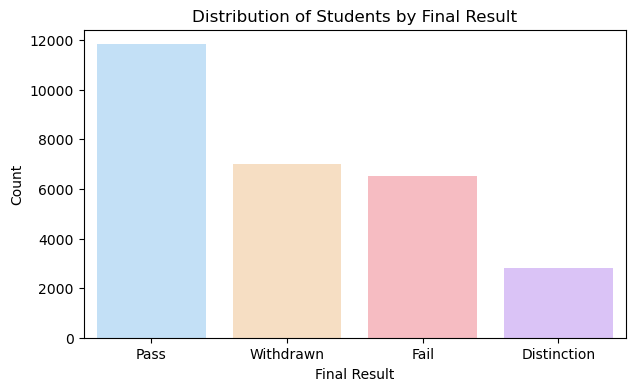

In [73]:
#Distribution of Final Results after merge
plt.figure(figsize=(7,4))
sns.countplot(data=student_data_final, x='final_result',palette=bright_pastels)
plt.title("Distribution of Students by Final Result")
plt.xlabel("Final Result")
plt.ylabel("Count")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot1.png")
plt.show()

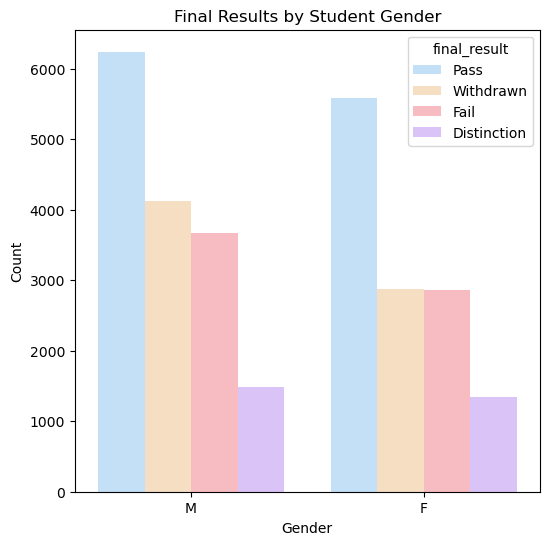

In [74]:
#Final result by gender in bar chart
plt.figure(figsize=(6, 6))
sns.countplot(data=student_data_final,x='gender', hue = 'final_result',palette = bright_pastels)
plt.title('Final Results by Student Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot2.png")
plt.show()

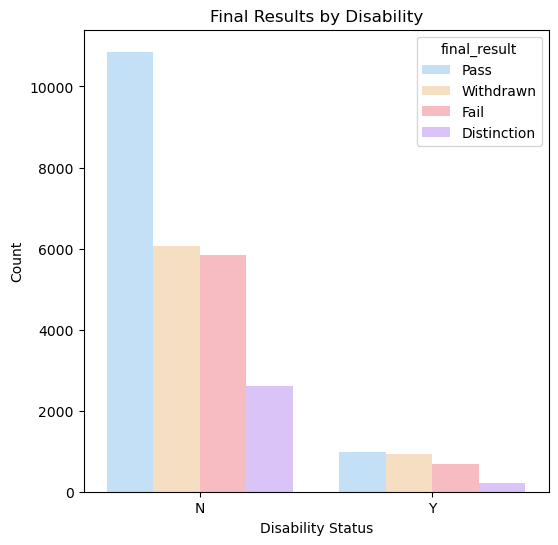

In [75]:
#Final result by gender in bar chart
plt.figure(figsize=(6, 6))
sns.countplot(data=student_data_final,x='disability', hue = 'final_result',palette = bright_pastels)
plt.title('Final Results by Disability')
plt.xlabel('Disability Status')
plt.ylabel('Count')
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot3.png")
plt.show()

In [76]:
bright_pastels_2 = [
    "#D9BAFF",  # PURPLE
    "#FFB3BA",  #RED
    "#BAE1FF",  #BLUE
    "#FFDFBA",  #ORANGE
    ]

<Figure size 2000x1800 with 0 Axes>

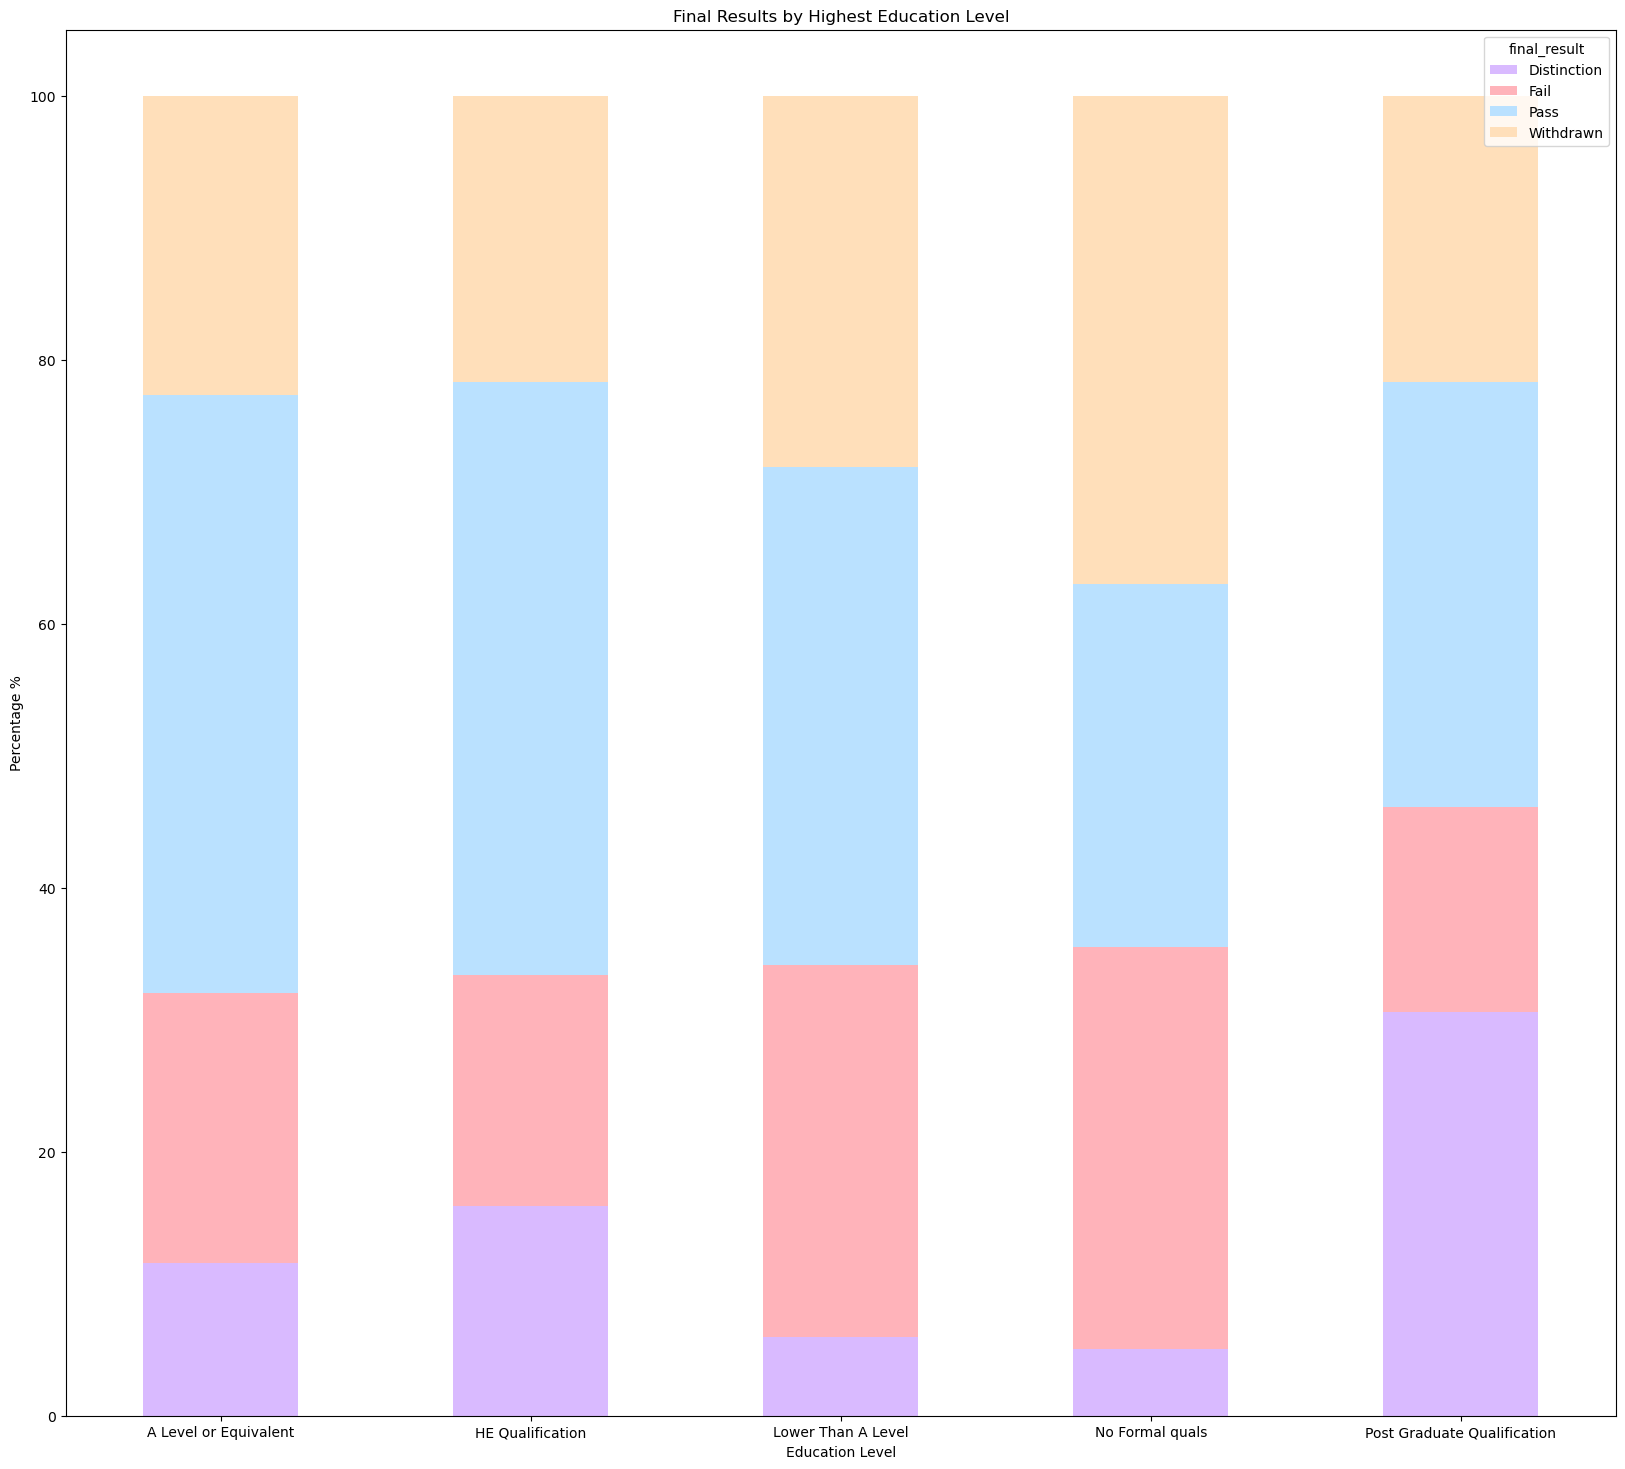

In [77]:
#Highest education level.
education_level_result = student_data_final.groupby(["highest_education", "final_result"]).size().unstack(fill_value=0)
education_pecent=education_level_result.div(education_level_result.sum(axis=1),axis=0)*100
plt.figure(figsize=(20,18))
education_pecent.plot(kind='bar', stacked=True,color=bright_pastels_2,figsize=(20,18))
plt.title("Final Results by Highest Education Level")
plt.ylabel("Percentage %")
plt.xlabel("Education Level")
plt.xticks(rotation=0,ha="center")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot4.png")
plt.show()

<Figure size 1500x800 with 0 Axes>

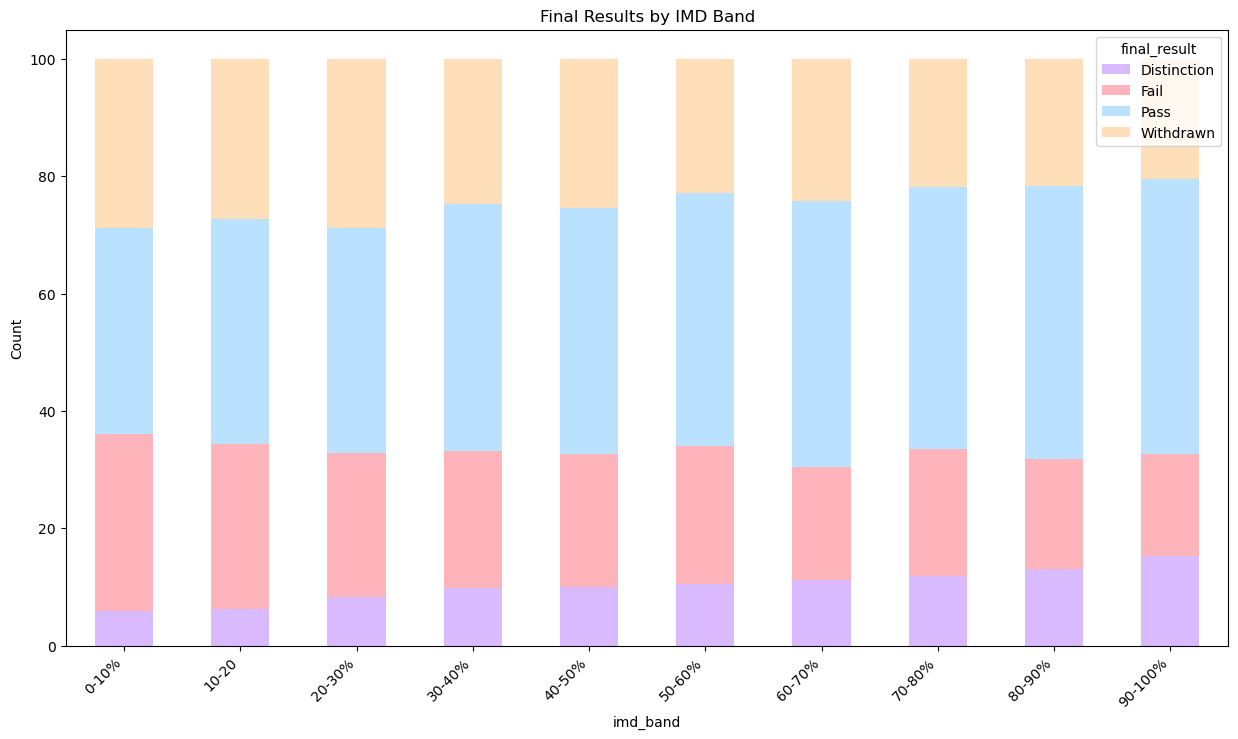

In [78]:
#Imd Band by Final Result.
imd_band_result=student_data_final.groupby(["imd_band", "final_result"]).size().unstack(fill_value=0)
imd_percent=imd_band_result.div(imd_band_result.sum(axis=1),axis=0)*100
plt.figure(figsize=(15,8))
imd_percent.plot(kind='bar',stacked=True,color=bright_pastels_2,figsize=(15,8))
plt.title("Final Results by IMD Band")
plt.xlabel('imd_band')
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot5.png")
plt.show()

<Figure size 1500x800 with 0 Axes>

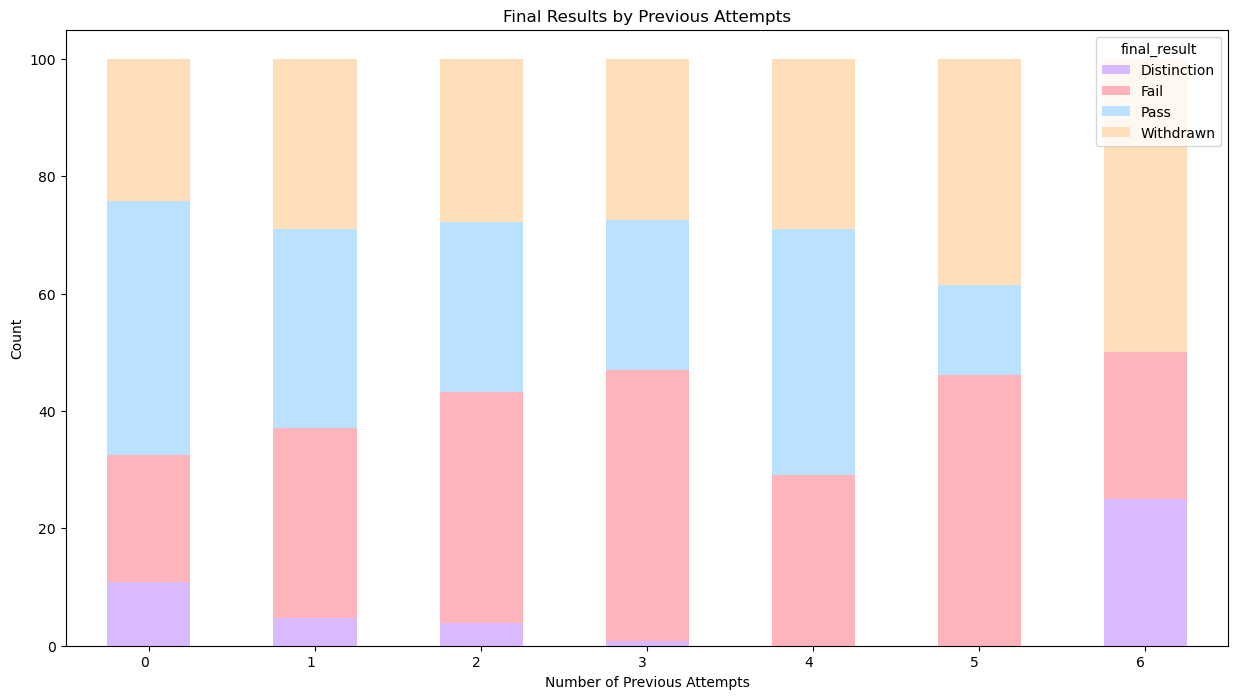

In [79]:
previous_att_result=student_data_final.groupby(["num_of_prev_attempts", "final_result"]).size().unstack(fill_value=0)
previous_att_percent=previous_att_result.div(previous_att_result.sum(axis=1),axis=0)*100
plt.figure(figsize=(15,8))
previous_att_percent.plot(kind='bar',stacked=True,color=bright_pastels_2,figsize=(15,8))
plt.title("Final Results by Previous Attempts")
plt.xlabel('Number of Previous Attempts')
plt.ylabel("Count")
plt.xticks(rotation=360,ha="right")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot10.png")
plt.show()

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\4086032913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_data_final,x='final_result',y='studied_credits',palette=bright_pastels)


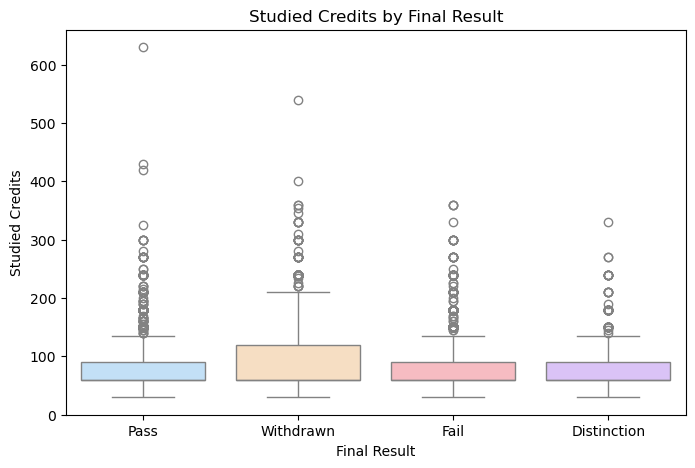

In [80]:
#Studied Credits vs Final Result
plt.figure(figsize=(8,5))
sns.boxplot(data=student_data_final,x='final_result',y='studied_credits',palette=bright_pastels)
plt.title("Studied Credits by Final Result")
plt.xlabel("Final Result")
plt.ylabel("Studied Credits")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot6.png")
plt.show()

<Figure size 1200x700 with 0 Axes>

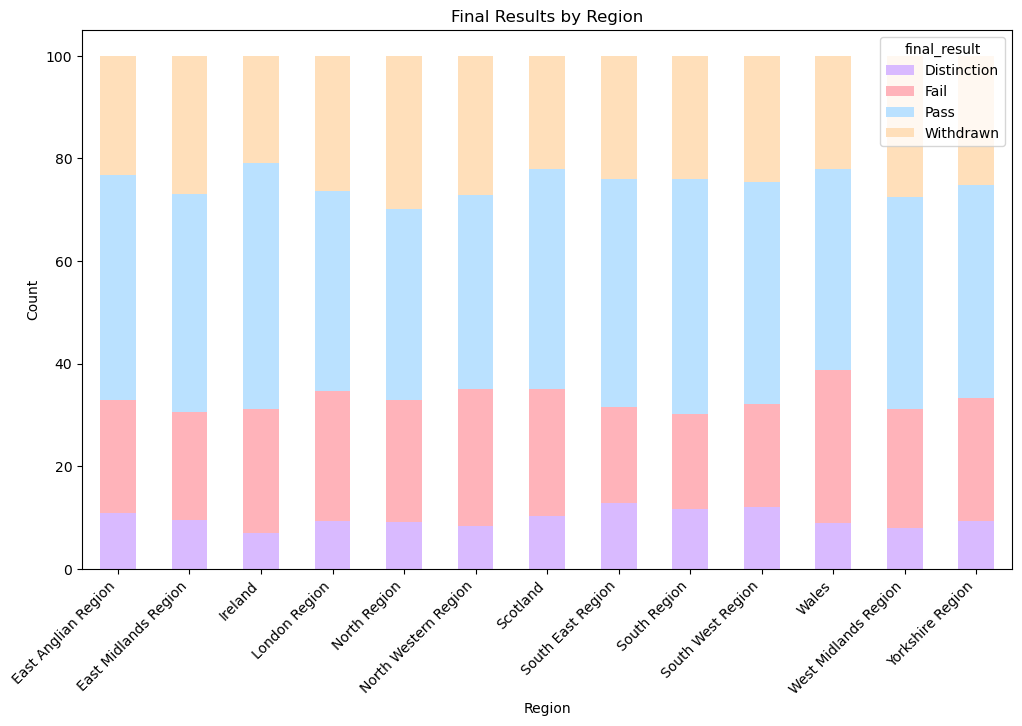

In [81]:
#Region by Result
region_result=student_data_final.groupby(["region", "final_result"]).size().unstack(fill_value=0)
region_percent=region_result.div(region_result.sum(axis=1),axis=0)*100
plt.figure(figsize=(12,7))
region_percent.plot(kind='bar',stacked=True,color=bright_pastels_2,figsize=(12,7))
plt.title("Final Results by Region")
plt.xlabel('Region')
plt.ylabel("Count")
plt.xticks(rotation=45,ha="right")
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot7.png")
plt.show()

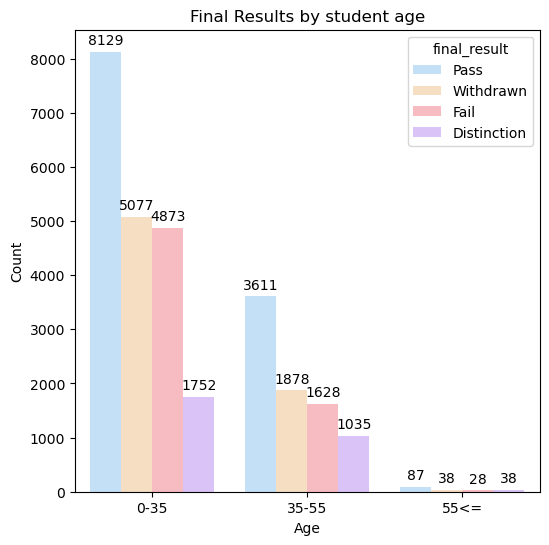

In [82]:
#Age distribtion
plt.figure(figsize=(6, 6))
age_order = ['0-35', '35-55','55<='] #Categories
age = sns.countplot(data=student_data_final,x='age_band',hue='final_result',palette =bright_pastels,order=age_order)
for container in age.containers:
    age.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.title('Final Results by student age')
plt.xlabel('Age')
plt.ylabel('Count')
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot8.png")
plt.show()

C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2525124623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col,y=metric,data=student_data_final,palette=bright_pastels)
C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2525124623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col,y=metric,data=student_data_final,palette=bright_pastels)
C:\Users\chanl\AppData\Local\Temp\ipykernel_31424\2525124623.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col,y=metric,data=student_data_final,palette=bright_pastels)
C

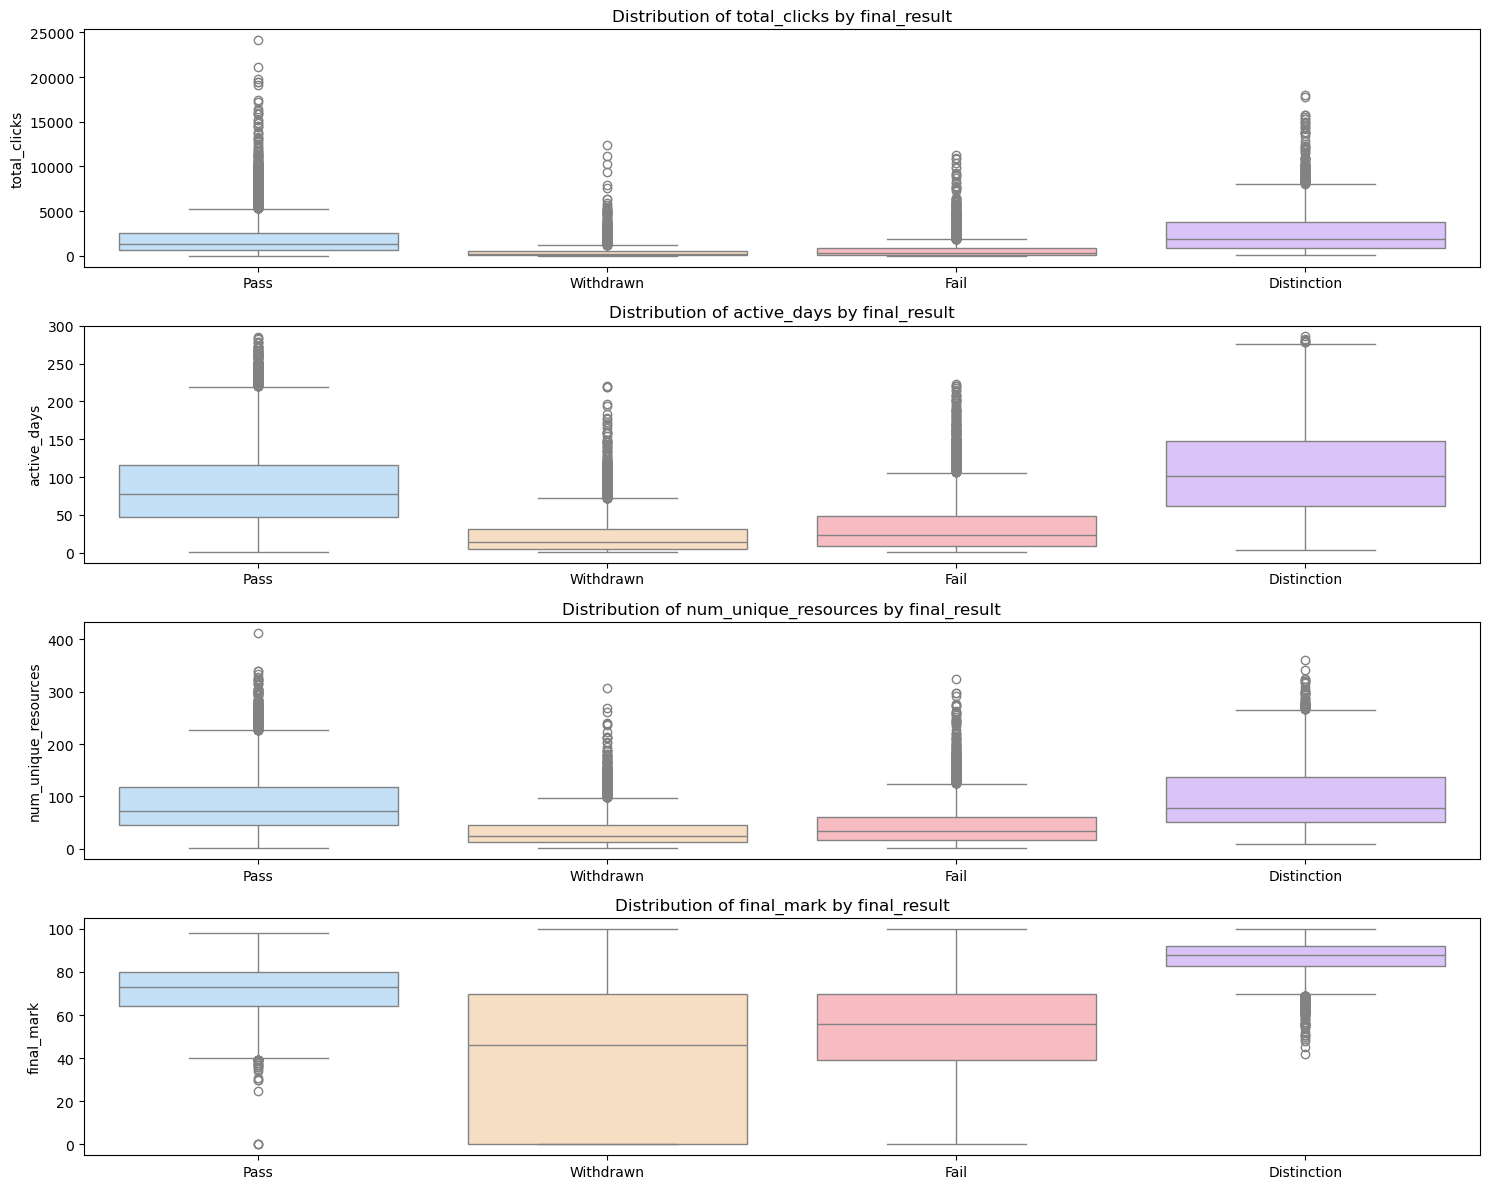

In [118]:
metrics = ['total_clicks', 'active_days', 'num_unique_resources','final_mark']
group_col = 'final_result'
plt.figure(figsize=(15, 12))
for i, metric in enumerate(metrics, 1):
    plt.subplot(4,1,i)
    sns.boxplot(x=group_col,y=metric,data=student_data_final,palette=bright_pastels)
    plt.title(f'Distribution of {metric} by {group_col}')
    plt.xlabel('')
    plt.ylabel(metric)
plt.tight_layout()
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot9.png")
plt.show()

In [85]:
df = student_data_final.copy()

In [86]:
df.head(5)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,final_mark,high_mark_fail,date_unregistration,module_presentation_length,total_clicks,active_days,num_unique_resources
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82,0,0,268,934.0,40.0,55.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65,0,0,268,1435.0,80.0,84.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,0,0,1,268,281.0,12.0,22.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76,0,0,268,2158.0,123.0,82.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55,0,0,268,1034.0,70.0,66.0


In [87]:
df.columns

Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'final_mark',
       'high_mark_fail', 'date_unregistration', 'module_presentation_length',
       'total_clicks', 'active_days', 'num_unique_resources'],
      dtype='object')

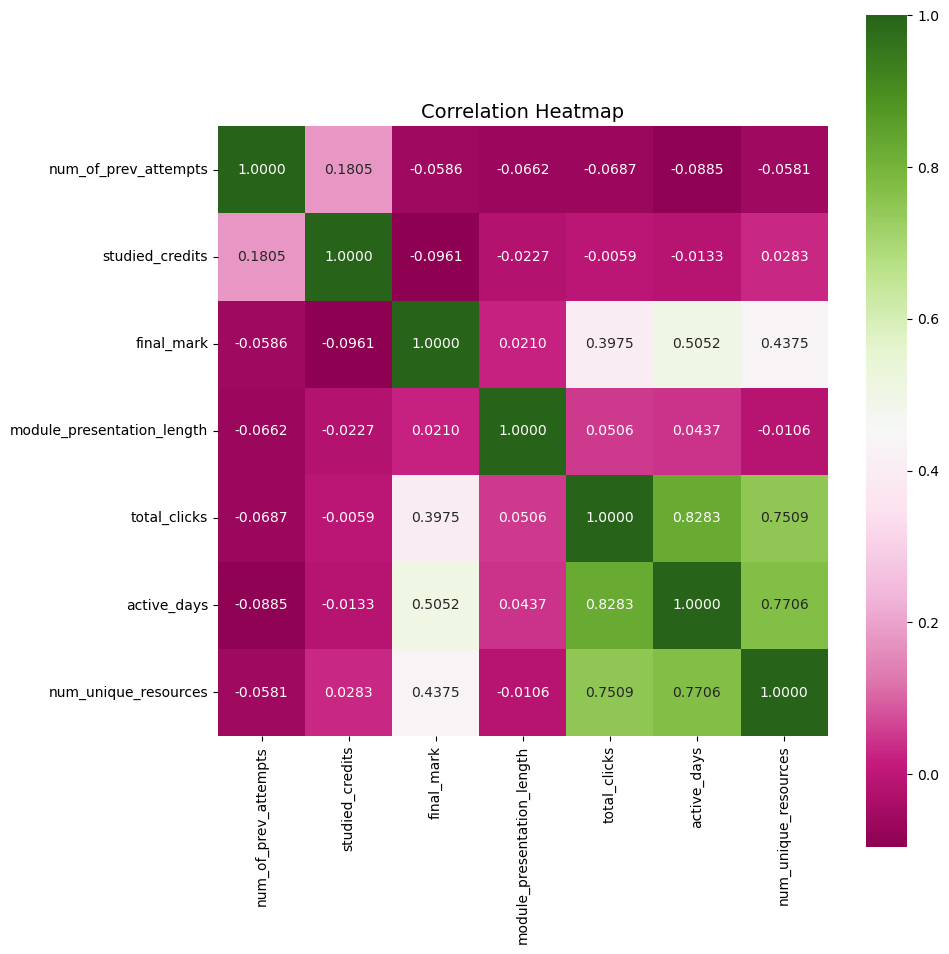

In [88]:
# Select numeric columns only from df
exclude_cols = ['id_student']
numeric_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col not in exclude_cols]
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cbar=True,cmap='PiYG',square=True,fmt=".4f")
plt.title("Correlation Heatmap",fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
#plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot11.png")
plt.show()

# **MODELS**

In [89]:
#Chi Square Test for Categorical Variables
df_chi_square = df.copy()
categorical_cols = df_chi_square.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols if col != 'final_result'] # excluding final_result column
columns_significant_assoc = []
for col in categorical_cols:
    table = pd.crosstab(df_chi_square[col], df_chi_square['final_result'])
    chi2,p,dof,expected = chi2_contingency(table) #Chi Square Test
    print(f"Feature:{col}=chi-square value:{chi2:.3f} with dof={dof} and p-value:{p:.3f}")
    if p < 0.05: # alpha=0.05 l.o.s
        columns_significant_assoc.append(col)

Feature:code_module=chi-square value:1493.976 with dof=18 and p-value:0.000
Feature:code_presentation=chi-square value:345.696 with dof=9 and p-value:0.000
Feature:gender=chi-square value:76.058 with dof=3 and p-value:0.000
Feature:region=chi-square value:278.761 with dof=36 and p-value:0.000
Feature:highest_education=chi-square value:867.330 with dof=12 and p-value:0.000
Feature:imd_band=chi-square value:545.805 with dof=27 and p-value:0.000
Feature:age_band=chi-square value:196.203 with dof=6 and p-value:0.000
Feature:disability=chi-square value:138.918 with dof=3 and p-value:0.000
Feature:high_mark_fail=chi-square value:5787.940 with dof=3 and p-value:0.000
Feature:date_unregistration=chi-square value:27784.134 with dof=3 and p-value:0.000


In [90]:
df_backup = df.copy()

In [91]:
df_backup.drop('id_student', axis=1, inplace=True)

In [92]:
leakage_vars = ['date_unregistration','high_mark_fail']

In [93]:
df_backup=df_backup.drop(columns=leakage_vars)

In [94]:
y = df_backup['final_result']
x = df_backup.drop(columns=['final_result'])

In [95]:
#Splitting of training and test by 70:30 using seed 333
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.3,random_state=333,stratify=y)

In [96]:
y_train

21257           Pass
11044           Pass
22889           Fail
17216           Pass
13785           Fail
            ...     
31883           Fail
22629    Distinction
29468      Withdrawn
174             Pass
28158           Fail
Name: final_result, Length: 19721, dtype: object

In [97]:
# Encode categorical variables on Train Data
x_train_categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()
x_train_numerical_cols = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
x_train_num=x_train[x_train_numerical_cols] #Only Numeric Colums in Train
x_train_cat = pd.get_dummies(x_train[x_train_categorical_cols], drop_first=True) # Catgeorical Encoding on Train
x_train_cat=x_train_cat.reindex(columns=x_train_cat.columns, fill_value=0)
combined_x_train=pd.concat([x_train[x_train_numerical_cols],x_train_cat],axis=1) #Combined Encoding and Numerical Train

In [98]:
# Encode categorical variables on Test Data
x_test_categorical_cols = x_test.select_dtypes(include=['object', 'category']).columns.tolist()
x_test_numerical_cols = x_test.select_dtypes(include=['int64', 'float64']).columns.tolist()
x_test_num=x_test[x_test_numerical_cols] #Only Numeric Colums in Test
x_test_cat = pd.get_dummies(x_test[x_test_categorical_cols], drop_first=True) # Catgeorical Encoding on Test
x_test_cat=x_test_cat.reindex(columns=x_train_cat.columns, fill_value=0) #Reindexing Test
combined_x_test=pd.concat([x_test[x_test_numerical_cols],x_test_cat],axis=1) #Combined Encoding and Numerical Test

# **MULTI LOGISTIC REGRESSION**

In [99]:
le = LabelEncoder()
le.classes_ = np.array(['Pass', 'Fail', 'Distinction', 'Withdrawn'])

In [100]:
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

In [101]:
scaler = StandardScaler()
x_train_num_scaled = scaler.fit_transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)

In [102]:
#Multi Logistic Regression Training Data Set
x_train_logreg=np.concatenate([x_train_num_scaled, x_train_cat],axis=1)

In [103]:
#Multi Logistic Regression Test Data Set
x_test_logreg=np.concatenate([x_test_num_scaled, x_test_cat],axis=1)

In [119]:
print("Train shape:", x_train_logreg.shape)
print("Test shape:", x_test_logreg.shape)

Train shape: (19721, 45)
Test shape: (8453, 45)


C:\Users\chanl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chanl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chanl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\chanl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

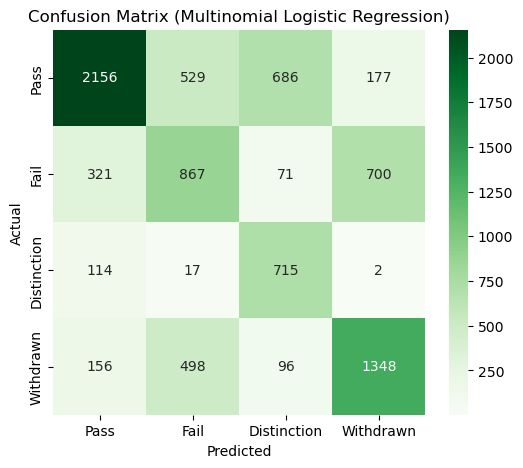

Accuracy: 0.602
Precision(macro): 0.575
Sensitivity/Recall (macro): 0.634
ROC AUC (macro): 0.863
Specificity (approx): 0.867
Cohen's Kappa: 0.452
MCC: 0.458
F1 Score: 0.587


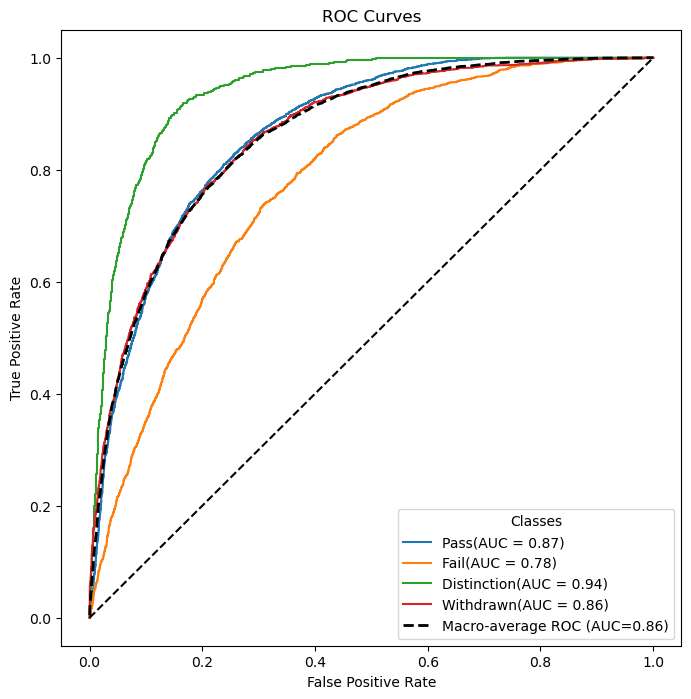

In [105]:
multi_log_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)

param_grid={'C':[0.1,1,10,100],}

grid_search=GridSearchCV(multi_log_model,param_grid,scoring='accuracy',cv=5)
grid_search.fit(x_train_logreg,y_train_enc)


lrmodel=grid_search.best_estimator_
y_train_pred_lg=lrmodel.predict(x_train_logreg)
y_test_pred_lg=lrmodel.predict(x_test_logreg)

# Calculate Probabilities
classes = np.unique(y_train_enc)
class_names=le.classes_
y_train_prob_lg = lrmodel.predict_proba(x_train_logreg)
y_test_prob_lg = lrmodel.predict_proba(x_test_logreg)

y_test_bin = label_binarize(y_test_enc, classes=classes)

truepositive_dict={}
falsepositive_dict={}
roc_auc_dict={}
for i,class_label in enumerate(class_names):
    falsepositive_dict[i], truepositive_dict[i], _=roc_curve(y_test_bin[:, i], y_test_prob_lg[:, i])
    roc_auc_dict[i] = auc(falsepositive_dict[i], truepositive_dict[i])
all_falsepositive=np.unique(np.concatenate([falsepositive_dict[i] for i in range(len(class_names))]))
mean_truepositive=np.zeros_like(all_falsepositive)
for i in range(len(class_names)):
    mean_truepositive += np.interp(all_falsepositive,falsepositive_dict[i],truepositive_dict[i])
mean_truepositive /= len(class_names)


#Confusion Matrix on test data
cm_lg = confusion_matrix(y_test_enc, y_test_pred_lg)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lg, annot=True,fmt='d',cmap='Greens',xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Multinomial Logistic Regression)")
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot12.png")
plt.show()
#Evaluation Metrics
accuracy_lg = accuracy_score(y_test_enc, y_test_pred_lg)
precision_lg = precision_score(y_test_enc, y_test_pred_lg, average='macro')
recall_lg = recall_score(y_test_enc, y_test_pred_lg, average='macro')  # sensitivity
mcc_lg = matthews_corrcoef(y_test_enc, y_test_pred_lg)
kappa_lg = cohen_kappa_score(y_test_enc, y_test_pred_lg)
specificity_list_lg = []
for i in range(len(classes)):
    TP = cm_lg[i, i]
    FN = cm_lg[i, :].sum()-TP
    FP = cm_lg[:, i].sum()-TP
    TN = cm_lg.sum()-(TP + FP + FN)
    specificity_list_lg.append(TN/(TN + FP))
specificity_lg = np.mean(specificity_list_lg)
roc_auc_macro_lg = roc_auc_score(y_test_bin, y_test_prob_lg, average='macro')
f1_lg=f1_score(y_test_enc,y_test_pred_lg,average='macro')
print(f"Accuracy: {accuracy_lg:.3f}")
print(f"Precision(macro): {precision_lg:.3f}")
print(f"Sensitivity/Recall (macro): {recall_lg:.3f}")
print(f"ROC AUC (macro): {roc_auc_macro_lg:.3f}")
print(f"Specificity (approx): {specificity_lg:.3f}")
print(f"Cohen's Kappa: {kappa_lg:.3f}")
print(f"MCC: {mcc_lg:.3f}")
print(f"F1 Score: {f1_lg:.3f}")
#ROC CURVES
plt.figure(figsize=(8,8))
for i,class_label in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob_lg[:, i])
    plt.plot(fpr, tpr, label=f"{class_label}(AUC = {auc(fpr, tpr):.2f})")
plt.plot(all_falsepositive, mean_truepositive, linestyle='--',color='black',lw=2,label=f"Macro-average ROC (AUC={roc_auc_macro_lg:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(title="Classes", loc="lower right")
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot13.png")
plt.show()

In [106]:
coefficients = lrmodel.coef_
class_names=le.classes_
coefficients_value=pd.DataFrame(coefficients,columns=combined_x_train.columns)
coefficients_value['Class']=class_names
coefficients_value=coefficients_value.set_index("Class")
#print(coefficients_value)
ml_importance = coefficients_value.abs().mean().sort_values(ascending=False)
ml_importance_10=ml_importance.head(10)
print(ml_importance_10)

final_mark                 2.268775
code_module_GGG            1.659493
code_module_FFF            1.340760
code_module_DDD            1.067099
active_days                0.959031
num_unique_resources       0.745286
code_module_BBB            0.678306
code_module_CCC            0.650103
code_presentation_2013J    0.576446
age_band_55<=              0.471516
dtype: float64


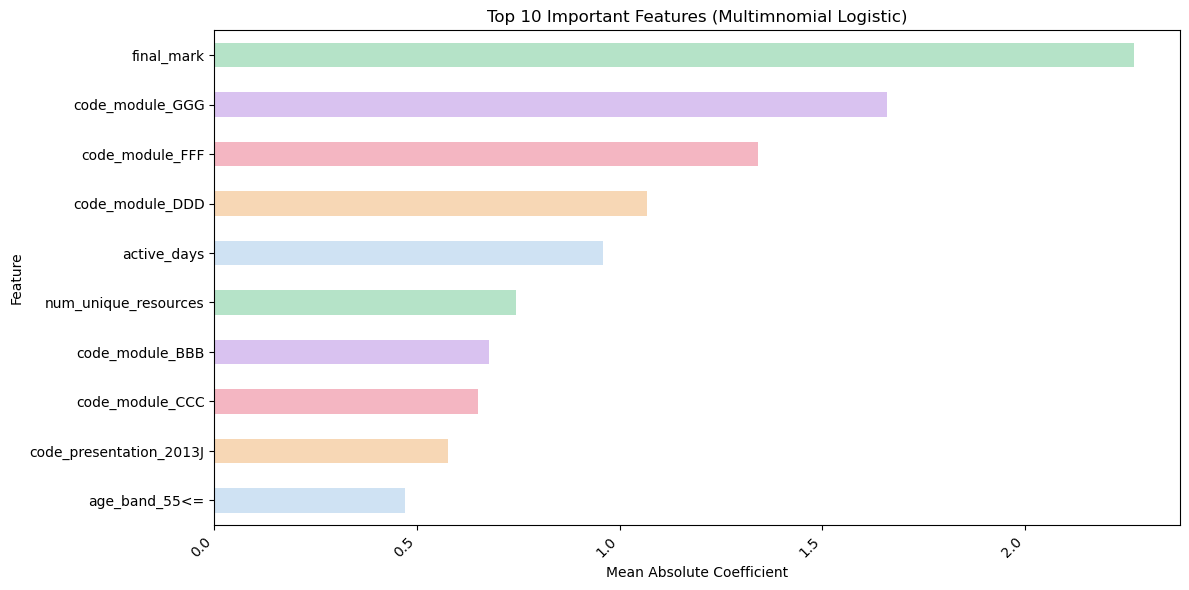

In [107]:
pastel_blue = "#cfe2f3"
pastel_peach = "#f7d7b5"
pastel_pink = "#f4b6c2"
pastel_lavender = "#d9c2f0"
pastel_green = "#b5e3c8"
pastel_colors = [
    pastel_blue, pastel_peach, pastel_pink,
    pastel_lavender, pastel_green,
    pastel_blue, pastel_peach, pastel_pink,
    pastel_lavender, pastel_green
]
plt.figure(figsize=(12,6))
ml_importance_10.sort_values().plot(kind='barh',color=pastel_colors)
plt.ylabel("Feature")
plt.xlabel("Mean Absolute Coefficient")
plt.title("Top 10 Important Features (Multimnomial Logistic)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot153.png")
plt.show()

# **RANDOM FOREST**

In [108]:
x_train_rf= combined_x_train
x_test_rf = combined_x_test
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=333
)
rf.fit(x_train_rf, y_train_enc)
y_pred_rf = rf.predict(x_test_rf)

In [109]:
y_prob = rf.predict_proba(x_test_rf)
fpr = {}
tpr = {}
roc_auc = {}
for i, cls in enumerate(classes):
    fpr[cls], tpr[cls], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[cls] = auc(fpr[cls], tpr[cls])

print("\nROC AUC by Class:")
for cls in classes:
    print(f"{cls}: {roc_auc[cls]:.4f}")


ROC AUC by Class:
0: 0.8857
1: 0.8095
2: 0.9477
3: 0.8789


In [110]:
accuracy_rf = accuracy_score(y_test_enc, y_pred_rf)
precision_rf = precision_score(y_test_enc, y_pred_rf, average='macro')
recall_rf = recall_score(y_test_enc, y_pred_rf, average='macro')  # sensitivity
kappa_rf = cohen_kappa_score(y_test_enc, y_pred_rf)
mcc_rf = matthews_corrcoef(y_test_enc, y_pred_rf)
specificity_list_rf = []
for i in range(len(classes)):
    TP = cm_lg[i, i]
    FN = cm_lg[i, :].sum()-TP
    FP = cm_lg[:, i].sum()-TP
    TN = cm_lg.sum()-(TP + FP + FN)
    specificity_list_rf.append(TN/(TN + FP))
specificity_rf = np.mean(specificity_list_rf)
roc_auc_macro_rf = roc_auc_score(y_test_bin, y_prob, average='macro')
f1_rf=f1_score(y_test_enc,y_pred_rf,average='macro')
print(f"Accuracy: {accuracy_rf:.3f}")
print(f"Precision(macro): {precision_rf:.3f}")
print(f"Sensitivity/Recall (macro): {recall_rf:.3f}")
print(f"ROC AUC (macro): {roc_auc_macro_rf:.3f}")
print(f"Specificity (approx): {specificity_rf:.3f}")
print(f"Cohen's Kappa: {kappa_rf:.3f}")
print(f"MCC: {mcc_rf:.3f}")
print(f"F1 Score: {f1_rf:.3f}")

Accuracy: 0.663
Precision(macro): 0.631
Sensitivity/Recall (macro): 0.637
ROC AUC (macro): 0.880
Specificity (approx): 0.867
Cohen's Kappa: 0.513
MCC: 0.515
F1 Score: 0.632


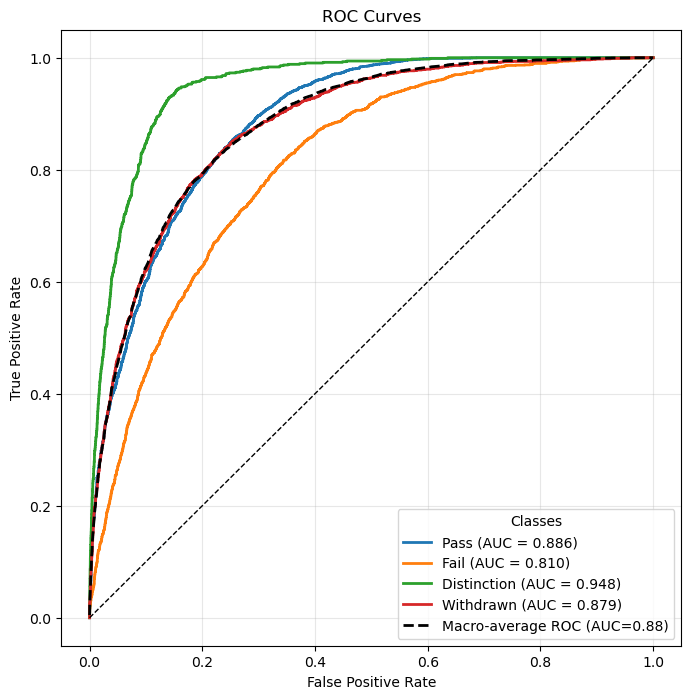

In [111]:
plt.figure(figsize=(8, 8))
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC = {roc_auc:.3f})")
truepositive_dict={}
falsepositive_dict={}
roc_auc_dict={}
for i,class_label in enumerate(class_names):
    falsepositive_dict[i], truepositive_dict[i], _=roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc_dict[i] = auc(falsepositive_dict[i], truepositive_dict[i])
all_falsepositive=np.unique(np.concatenate([falsepositive_dict[i] for i in range(len(class_names))]))
mean_truepositive=np.zeros_like(all_falsepositive)
for i in range(len(class_names)):
    mean_truepositive += np.interp(all_falsepositive,falsepositive_dict[i],truepositive_dict[i])
mean_truepositive /= len(class_names)
plt.plot([0, 1],[0, 1],'k--', lw=1)
plt.plot(all_falsepositive, mean_truepositive,linestyle='--',color='black',lw=2,label=f"Macro-average ROC (AUC={roc_auc_macro_rf:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(title="Classes", loc="lower right")
plt.grid(alpha=0.3)
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot14.png")
plt.show()

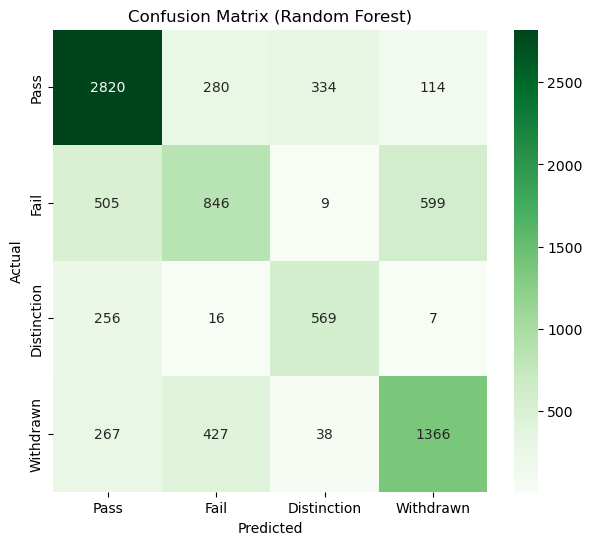

In [112]:
cm = confusion_matrix(y_test_enc, y_pred_rf)
plt.figure(figsize=(7,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot15.png")
plt.show()

In [113]:
importance = rf.feature_importances_
feature_importance = pd.Series(importance, index=x_train_rf.columns)
top_10 = feature_importance.sort_values(ascending=False)
print(top_10.head(10))

final_mark                              0.251389
active_days                             0.159622
total_clicks                            0.131467
num_unique_resources                    0.115433
studied_credits                         0.033039
module_presentation_length              0.023690
code_module_GGG                         0.016374
highest_education_Lower Than A Level    0.015898
code_module_BBB                         0.013797
code_module_FFF                         0.013429
dtype: float64


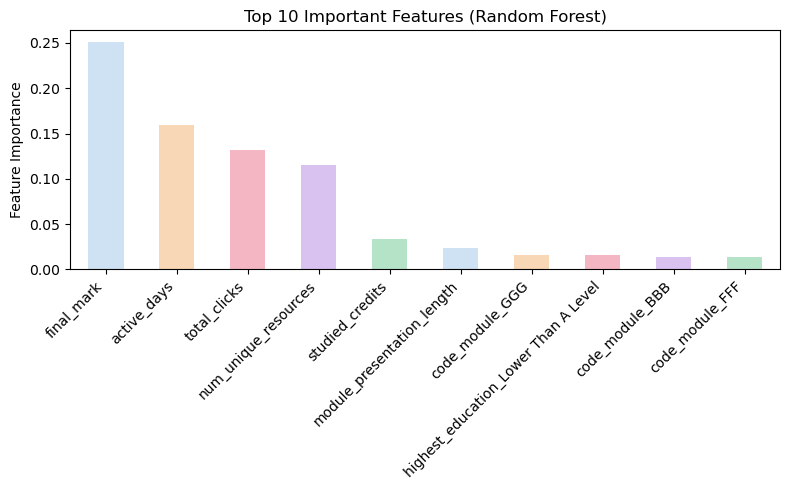

In [114]:
top_10 = feature_importance.sort_values(ascending=False).head(10)
pastel_blue = "#cfe2f3"
pastel_peach = "#f7d7b5"
pastel_pink = "#f4b6c2"
pastel_lavender = "#d9c2f0"
pastel_green = "#b5e3c8"
pastel_colors = [
    pastel_blue, pastel_peach, pastel_pink,
    pastel_lavender, pastel_green,
    pastel_blue, pastel_peach, pastel_pink,
    pastel_lavender, pastel_green
]
plt.figure(figsize=(8,5))
top_10.plot(kind='bar',color=pastel_colors,linewidth=1)
plt.ylabel("Feature Importance")
plt.title("Top 10 Important Features (Random Forest)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot151.png")
plt.show()

# **SUPPORT VECTOR MACHINE**

In [115]:
x_train_svm = np.concatenate([x_train_num_scaled, x_train_cat],axis=1)
x_test_svm = np.concatenate([x_test_num_scaled, x_test_cat],axis=1)
param_grid_var={
    'C': [10], #10 was selected as best C value [0.01,0.1,1,10]
    'gamma':[0.1], #out of all [0.01,0.1,1,10]
    'kernel':['rbf'] #Was selected over linear
}
search=GridSearchCV(SVC(class_weight='balanced',probability=False,random_state=333),
                          param_grid_var,
                          cv=5,
                          scoring='accuracy',
                          refit=True,n_jobs=-1)
search.fit(x_train_svm,y_train_enc)
print("Paramters",search.best_params_)
print("Best Score",search.best_score_)
svm_model=SVC(**search.best_params_,class_weight='balanced',probability=False,random_state=333)
svm_model.fit(x_train_svm,y_train_enc)
svm_model_calibration = CalibratedClassifierCV(svm_model, cv='prefit',method='sigmoid')
svm_model_calibration.fit(x_train_svm, y_train_enc)
y_test_pred_svm=svm_model_calibration.predict(x_test_svm)
y_test_prob_svm=svm_model_calibration.predict_proba(x_test_svm)

Paramters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score 0.6138630947331076


C:\Users\chanl\anaconda3\Lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


Paramters {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score 0.5867351540065351

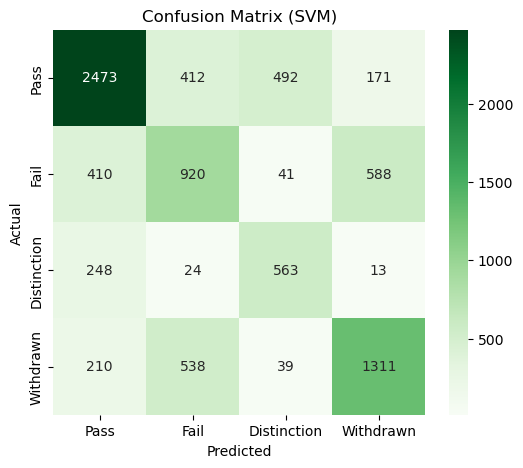

Accuracy: 0.623
Precision (macro): 0.588
Sensitivity / Recall (macro): 0.614
Specificity (approx): 0.869
Cohen's Kappa: 0.467
MCC: 0.468
The F-1 score: 0.5976
ROC AUC (macro): 0.851


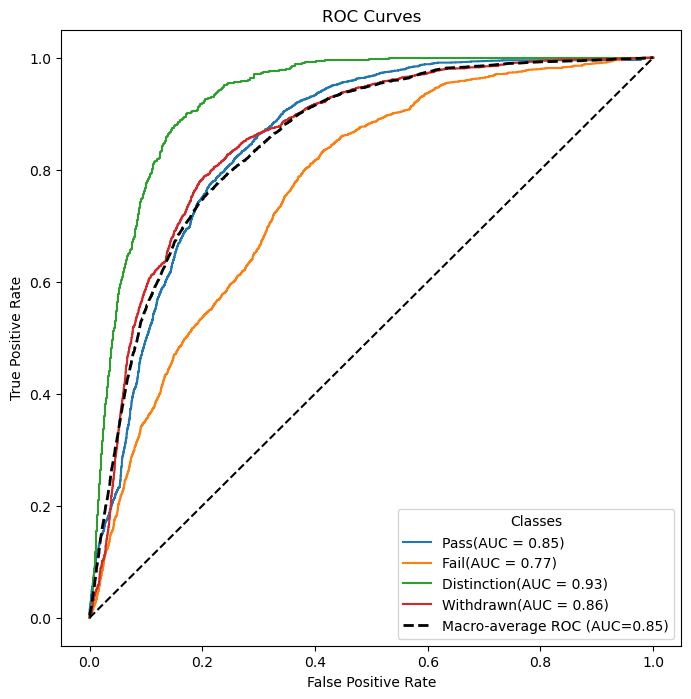

In [116]:
accuracy_svm = accuracy_score(y_test_enc, y_test_pred_svm)
precision_svm = precision_score(y_test_enc, y_test_pred_svm, average='macro')
recall_svm = recall_score(y_test_enc, y_test_pred_svm,average='macro')  # sensitivity
kappa_svm = cohen_kappa_score(y_test_enc,y_test_pred_svm)
mcc_svm = matthews_corrcoef(y_test_enc,y_test_pred_svm)
roc_auc_macro_lg = roc_auc_score(y_test_bin, y_test_prob_svm, average='macro')
f1=f1_score(y_test_enc,y_test_pred_svm,average='macro')

truepositive_svm_dict={}
falsepositive_svm_dict={}
roc_auc_dict_svm={}
for i,class_label in enumerate(class_names):
    falsepositive_svm_dict[i], truepositive_svm_dict[i], _=roc_curve(y_test_bin[:, i], y_test_prob_svm[:, i])
    roc_auc_dict[i] = auc(falsepositive_svm_dict[i], truepositive_svm_dict[i])
all_svm_falsepositive=np.unique(np.concatenate([falsepositive_svm_dict[i] for i in range(len(class_names))]))
mean_truepositive_svm=np.zeros_like(all_svm_falsepositive)
for i in range(len(class_names)):
    mean_truepositive_svm += np.interp(all_svm_falsepositive,falsepositive_svm_dict[i],truepositive_svm_dict[i])
mean_truepositive_svm /= len(class_names)
classes=le.classes_
cm_svm = confusion_matrix(y_test_enc, y_test_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm ,annot=True,fmt='d',cmap='Greens',xticklabels=classes,yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM)")
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot16.png")
plt.show()
specificity_list_svm = []
for i in range(len(classes)):
    TP = cm_svm[i,i]
    FN = cm_svm[i,:].sum()-TP
    FP = cm_svm[:,i].sum()-TP
    TN = cm_svm.sum()-(TP + FP + FN)
    specificity_list_svm.append(TN/(TN + FP))
specificity_svm = np.mean(specificity_list_svm)
roc_auc_svm = roc_auc_score(y_test_bin, y_test_prob_svm, average='macro')
print(f"Accuracy: {accuracy_svm:.3f}")
print(f"Precision (macro): {precision_svm:.3f}")
print(f"Sensitivity / Recall (macro): {recall_svm:.3f}")
print(f"Specificity (approx): {specificity_svm:.3f}")
print(f"Cohen's Kappa: {kappa_svm:.3f}")
print(f"MCC: {mcc_svm:.3f}")
print(f"The F-1 score: {f1:.4f}")
print(f"ROC AUC (macro): {roc_auc_svm:.3f}")
#ROC Plots
plt.figure(figsize=(8,8))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_test_prob_svm[:, i])
    plt.plot(fpr, tpr, label=f"{class_label}(AUC = {auc(fpr, tpr):.2f})")
plt.plot(all_svm_falsepositive,mean_truepositive_svm,linestyle='--',color='black',label=f"Macro-average ROC (AUC={roc_auc_macro_lg:.2f})",lw=2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend(title="Classes", loc="lower right")
plt.savefig("C:/Users/chanl/OneDrive/Documents/DMML/plot17.png")
plt.show()